In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pandasql import sqldf
from collections import Counter
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.0f}'.format #round float
pd.options.mode.chained_assignment = None  # disable copy warning

%matplotlib inline
pysqldf = lambda q: sqldf(q, globals())


In [2]:
#load data
db_topic = pd.read_csv('D:/Users/Fei/AllTopics.csv')
db_post = pd.read_csv('D:/Users/Fei/PostsForAnalysis.csv')
db_user = pd.read_csv('D:/Users/Fei/UsersForAnalysis.csv')


D:\Users\Fei\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (13,14,15,16,17,18,19,22,25,31,33,35,36,37,38,39,40,42,43,44,45,46,48,50,51,53,55,56,57,60,63,64,66,67,68,69,70,79,81,83,84,85,86,87,88,90,95,100,103,104,106,107,110,113,114,115,118,119,121,122,126,127,131,132,134,135,138,139,140,141,142,148,149,151,152,154,157,159,163,164,167,169,171,173,174,175,178,179,182,185,187,190,193,200,201,204,209,211,215,216,217,218,219,220,221,227,229,230,232,234,236,237,238,239,243,244,247,248,252,253,254,256,258,259,261,262,264,265,266,268,269,271,272,274,275,277,280,281,282,283,284,287,292,293,298,307,310,311,312) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
db_topic.head()

,id,name,description,num_followers,num_posts
0,356,touch-bar-apps,Apps built for Apple's new Touch Bar 👇,1753,14
1,355,airbnb,Travel the world and experience a place like y...,127,44
2,354,books,There’s just nothing like a good book. Expand ...,215,5379
3,353,games,Find something new and exciting to play at hom...,135,5389
4,352,tech,Hardware or software. Invention or innovation....,643,63552


In [4]:
db_post.head()

,id,date,day,created_at,time_of_day,name,tagline,thumbnail_type,product_state,comments_count,...,wi.fi,windows,wine,wordpress,writing.tools,xbox.one,yoga.books,youtube,user_id,votes_count
0,82423,2016-11-16,Wednesday,2016-11-16 00:20:00,Night,A.I. Experiments by Google,"Explore machine learning by playing w/ pics, m...",image,default,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61044,1500
1,82480,2016-11-16,Wednesday,2016-11-16 05:40:53,Morning,Init.ai,Build powerful and intelligent conversational ...,image,default,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,802
2,82502,2016-11-16,Wednesday,2016-11-16 10:16:06,Morning,Google Earth VR,Walk the earth in VR,image,default,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344208,544
3,82370,2016-11-16,Wednesday,2016-11-16 00:01:00,Night,Drop,Beautiful color picker with Touch Bar support,image,default,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28756,446
4,82460,2016-11-16,Wednesday,2016-11-16 01:13:32,Night,Lookback Live,Real-time user research on mobile and desktop ...,image,default,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591,416


In [5]:
db_user.head()

,user_id,created_at,name,username,headline,twitter_username,website_url,collections_count,followed_topics_count,followers_count,followings_count,maker_of_count,posts_count,votes_count
0,1,2013-11-21T23:06:54.070-08:00,Nathan Bashaw,nbashaw,Co-founder and CEO of Hardbound,nbashaw,https://hardbound.co,4,1,4014,1618,27,107,822
1,2,2013-11-21T23:28:43.634-08:00,Ryan Hoover,rrhoover,"Founder, Product Hunt",rrhoover,http://producthunt.com/@rrhoover,29,58,34079,1708,56,606,9140
2,3,2013-11-26T20:58:39.049-08:00,ash bhoopathy,ashbhoopathy,"partner, lab",ashbhoopathy,http://yakshaving.net,0,0,844,548,0,29,111
3,4,2013-11-27T11:25:57.920-08:00,Startup Edition,startupedition,"Creator, Startup Edition",startupedition,NaN,0,0,413,2,0,0,0
4,5,2013-11-27T11:32:37.172-08:00,@jongold,jongold,AI design tools,jongold,http://weirdwideweb.jon.gold,0,0,3597,746,1,19,362


In [6]:
#Top 10 spotters
top_10_spotter = db_user.groupby(['user_id','name','username'])['votes_count'].sum().nlargest(10).reset_index()
top_10_spotter= top_10_spotter.sort_values(by = ['votes_count'], ascending=False)
top_10_spotter = top_10_spotter.set_index('user_id')
top_10_spotter

,name,username,votes_count
user_id,,,
115829,Jonathan Levinson,jonathanlevins1,15682
345043,Eduard Ionuţ Ichim,eeschimosu,11092
48793,Jamie Davidoff,davidoff36ch2o,9731
2,Ryan Hoover,rrhoover,9140
76196,Jack Shalom,jeshalom,8886
151665,Kate,katesegrin,8642
144770,Zac Nielson,zacherynielson,8257
85429,Zeeshan Mughal,_zeeshan_mughal,7965
57468,Kendall Holliday,hi_kendall,7915


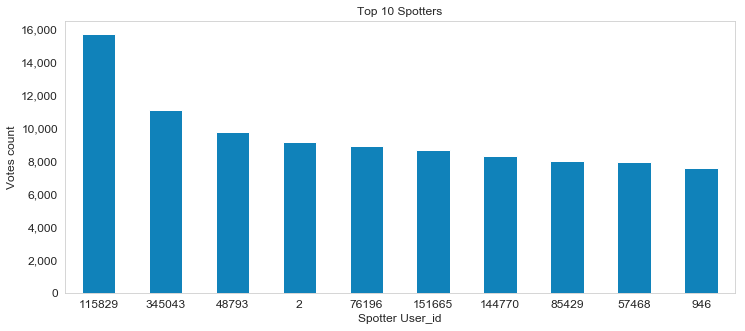

In [7]:
fig1, ax1 = plt.subplots(figsize=(12,5))
top_10_spotter.plot.bar(ax=ax1, fontsize = 12, color = ['#1082ba'],legend=False)
plt.title('Top 10 Spotters',fontsize = 12)
plt.xlabel('Spotter User_id',fontsize = 12)
plt.ylabel('Votes count',fontsize = 12)
plt.xticks(rotation=0)
plt.grid(False)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


In [8]:
#number of products users upvote by average
db_user['votes_count'].mean()

6.647699794053893

In [9]:
#Top 10 hot topics
top_10_topic = db_topic.groupby(['name'])['num_posts'].sum().nlargest(10).reset_index()
top_10_topic= top_10_topic.sort_values(by = ['num_posts'], ascending=False)
top_10_topic = top_10_topic.set_index('name')
top_10_topic

,num_posts
name,
tech,63552
web,12724
iphone,11276
podcasts,9043
android,6008
games,5389
books,5379
ipad,3802
productivity,3696


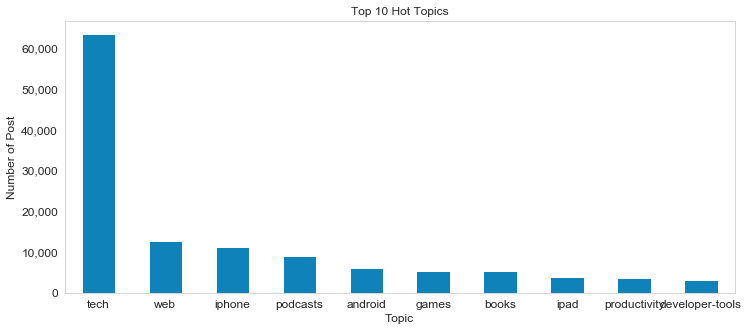

In [10]:
fig2, ax2 = plt.subplots(figsize=(12,5))
top_10_topic.plot.bar(ax=ax2, fontsize = 12, color = ['#1082ba'],legend=False)
plt.title('Top 10 Hot Topics',fontsize = 12)
plt.xlabel('Topic',fontsize = 12)
plt.ylabel('Number of Post',fontsize = 12)
plt.xticks(rotation=0)
plt.grid(False)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


In [11]:
# post count, vote count by day
pysqldf("""select day,count(id) as post_count, sum(votes_count) as vote_count
       from db_post 
       group by 1
       order by sum(votes_count) desc;""")

,day,post_count,vote_count
0,Tuesday,3596,772571
1,Wednesday,3591,746637
2,Thursday,3357,729216
3,Monday,2507,514791
4,Friday,2497,485656
5,Saturday,1335,261788
6,Sunday,1246,241387


In [12]:
# post count, vote count by time_of_day
pysqldf("""select time_of_day,count(id) as post_count, sum(votes_count) as vote_count
       from db_post 
       group by 1
       order by sum(votes_count) desc;""")

,time_of_day,post_count,vote_count
0,Night,9250,2235455
1,Morning,8028,1437399
2,Afternoon,724,71172
3,Evening,127,8020


In [13]:
# post count, vote count by thumbnail_type
pysqldf("""select thumbnail_type,count(id) as post_count, sum(votes_count) as vote_count
       from db_post 
       group by 1
       order by sum(votes_count) desc;""")

,thumbnail_type,post_count,vote_count
0,image,17878,3701655
1,video,239,48421
2,audio,11,1911
3,book_preview,1,59


In [14]:
# post count, vote count by product_state
pysqldf("""select product_state,count(id) as post_count, sum(votes_count) as vote_count
       from db_post 
       group by 1
       order by sum(votes_count) desc;""")

,product_state,post_count,vote_count
0,default,17022,3500339
1,pre_launch,769,168021
2,no_longer_online,338,83686


In [15]:
db_user['collections_count'].corr(db_user['votes_count'])

0.22615268045105996

In [16]:
db_post['comments_count'].corr(db_post['votes_count'])

0.7363845502881343

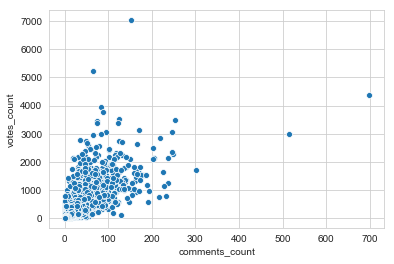

In [17]:
sns.scatterplot(x="comments_count", y="votes_count", data=db_post)

In [18]:
#average votes of product
pysqldf("""select avg(votes_count) as avg_vote 
       from db_post 
    ;""")

,avg_vote
0,207


In [19]:
# average votes of product with topic gif
pysqldf("""select avg(votes_count) as avg_vote_gif 
       from db_post 
       where gifs is not null ;""")

,avg_vote_gif
0,246


In [20]:
 db_post_2014 = pysqldf("""select tagline,strftime('%Y', created_at) as year 
       from db_post where year = '2014'
        ;""")

In [21]:
db_post_2015 = pysqldf("""select tagline,strftime('%Y', created_at) as year 
       from db_post where year = '2015'
        ;""")

In [22]:
db_post_2016 = pysqldf("""select tagline,strftime('%Y', created_at) as year 
       from db_post where year = '2016'
        ;""")

In [23]:
# Combine all tagline into a single string
db_post_2014 = " ".join(db_post_2014["tagline"].str.lower().tolist())
word_2014 = db_post_2014.split()
word_counts_2014 = Counter(word_2014)

# Get the most common 100 words
most_common_words_2014 = word_counts_2014.most_common(100)
for word, count in most_common_words_2014:
    print(f"{word}: {count}")

your: 289
for: 240
the: 235
a: 184
to: 166
and: 163
of: 106
in: 96
with: 94
&: 78
on: 77
from: 64
app: 54
you: 52
an: 43
way: 36
that: 34
by: 34
into: 33
best: 29
create: 29
beautiful: 28
new: 27
find: 27
one: 26
free: 26
share: 26
ios: 24
mac: 23
get: 22
build: 22
all: 22
turn: 21
design: 21
web: 21
friends: 21
(pre-launch): 19
photos: 19
any: 18
online: 18
mobile: 18
social: 17
favorite: 17
or: 17
simple: 17
people: 17
phone: 16
keyboard: 16
platform: 15
music: 15
at: 15
art: 15
discover: 15
iphone: 14
home: 14
game: 14
make: 14
own: 14
awesome: 14
more: 14
service: 13
first: 13
photo: 13
video: 13
w/: 13
apps: 13
as: 12
open: 12
email: 12
easiest: 12
easy: 12
using: 11
send: 11
product: 11
most: 11
coffee: 11
data: 11
world: 11
digital: 11
icons: 11
learn: 11
about: 11
great: 11
products: 11
book: 11
api: 10
videos: 10
ipad: 10
+: 10
(kickstarter): 10
-: 10
media: 10
made: 10
just: 10
search: 10
tinder: 10
browser: 10
what: 10
business: 10
live: 10


In [24]:
# Combine all tagline into a single string
db_post_2015 = " ".join(db_post_2015["tagline"].str.lower().tolist())
word_2015 = db_post_2015.split()
word_counts_2015 = Counter(word_2015)

# Get the most common 100 words
most_common_words_2015 = word_counts_2015.most_common(100)
for word, count in most_common_words_2015:
    print(f"{word}: {count}")

your: 2552
for: 2061
a: 1892
the: 1865
to: 1548
and: 1512
with: 886
in: 853
of: 792
on: 784
&: 700
you: 544
from: 529
app: 526
that: 346
new: 338
way: 307
an: 278
get: 273
by: 270
create: 257
share: 256
best: 248
find: 235
into: 234
free: 227
all: 193
simple: 190
video: 188
one: 183
ios: 178
mobile: 173
music: 168
any: 168
or: 157
photos: 154
make: 154
friends: 152
web: 151
iphone: 148
people: 147
watch: 147
discover: 146
beautiful: 144
mac: 141
product: 140
more: 138
email: 137
slack: 129
social: 129
now: 128
apple: 127
videos: 127
at: 127
turn: 126
time: 126
online: 126
every: 125
about: 123
design: 123
apps: 121
phone: 119
smart: 112
live: 111
platform: 110
text: 108
how: 108
build: 106
tool: 105
game: 105
most: 104
own: 103
content: 103
as: 100
track: 98
curated: 98
first: 98
is: 96
data: 96
news: 95
send: 95
made: 93
easy: 92
startup: 91
world's: 91
world: 89
photo: 89
better: 89
see: 89
personal: 89
android: 89
favorite: 87
help: 87
open: 87
service: 87
twitter: 86
learn: 86
busi

In [25]:
# Combine all tagline into a single string
db_post_2016 = " ".join(db_post_2016["tagline"].str.lower().tolist())
word_2016 = db_post_2016.split()
word_counts_2016 = Counter(word_2016)

# Get the most common 100 words
most_common_words_2016 = word_counts_2016.most_common(100)
for word, count in most_common_words_2016:
    print(f"{word}: {count}")

your: 2030
for: 1675
the: 1603
a: 1469
and: 1429
to: 1197
with: 782
in: 745
of: 637
on: 598
&: 556
you: 474
from: 412
app: 356
that: 314
create: 239
by: 234
an: 231
get: 230
new: 229
way: 216
share: 205
all: 203
into: 183
best: 174
slack: 163
free: 159
find: 156
bot: 150
discover: 144
smart: 144
web: 140
video: 140
music: 137
any: 136
simple: 132
make: 127
friends: 125
first: 124
one: 123
design: 120
people: 119
live: 116
mobile: 115
beautiful: 114
apps: 107
or: 106
turn: 106
tool: 104
social: 104
messenger: 103
iphone: 102
ios: 102
personal: 101
more: 100
search: 99
photos: 99
videos: 98
email: 98
send: 98
facebook: 97
time: 97
chat: 97
now: 93
most: 93
build: 91
at: 91
curated: 91
own: 89
every: 87
platform: 87
mac: 86
data: 85
using: 82
track: 81
news: 80
online: 80
about: 79
as: 79
website: 79
easy: 77
text: 76
favorite: 75
phone: 74
is: 74
product: 73
real: 72
help: 71
world's: 71
imessage: 71
better: 70
easiest: 70
use: 70
based: 70
emoji: 69
go: 69
watch: 68
real-time: 67
conten